<a href="https://colab.research.google.com/github/rsudiplive/Gradient_Descent_Algo_implementation/blob/main/gradient_descent_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is Gradient Descent?**<br>

Gradient Descent is an optimization algorithm in machine learning used to minimize a function by iteratively moving towards the minimum value of the function. <br>
We basically use this algorithm when we have to find the least possible values that can satisfy a given cost function. In machine learning, more often that not we try to minimize loss functions (like Mean Squared Error). By minimizing the loss function , we can improve our model, and Gradient Descent is one of the most popular algorithms used for this purpose.


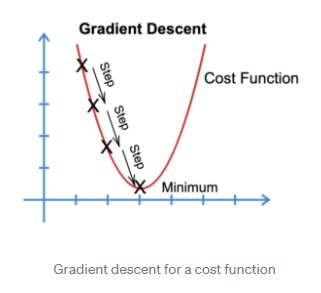

# Gradient Descent for Optimization

In [ ]:
# Matrix computations
from numpy import *
from numpy.linalg import norm

# Plotting
from matplotlib.pyplot import *

# Change size of figures
fig_size = [9,7]
rcParams["figure.figsize"] = fig_size

## Minimizing multiple variable function

Let us consider the following straight forward bivariate function $$f(x,y) = x^2 + y^2 + 1.$$ Since this a function of two variables, we have have the following partial derivatives $$\frac{df(x)}{dx} = f_{x} = 2x \text{ and } \frac{df(y)}{dy} = f_{y} = 2y.$$ Note that its easy to argue that the global minimum of $f(x,y)$ is (0,0) since $f(0,0) = 1$ and $f(x,y) \ge 1.$


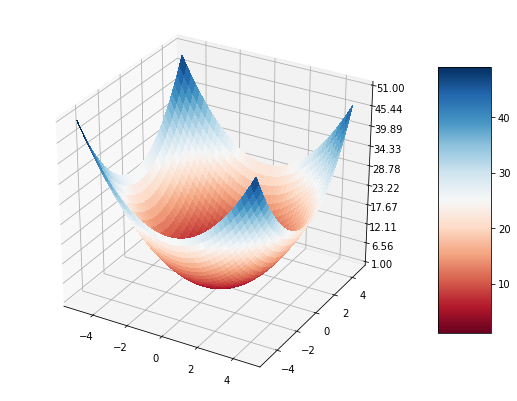

In [ ]:
# Plotting in 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# f(x,y) = x^2 + y^2 + 1
def f(x,y):
    return x**2 + y**2 + 1

# (X,Y) grid on [-5,5]
x = arange(-5, 5, 0.25)
y = arange(-5, 5, 0.25)
X, Y = meshgrid(x, y)


# z = x^2 + y^2
Z = f(X,Y)

# Plot (X,Y) in 3D
fig = figure(1)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
show()    

### Finding global minimum using gradient descent

For this example the gradient descent algorithm is simplified to

$$
\begin{bmatrix}
    x^{t+1} \\ 
    y^{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    x^{t} \\ 
    y^{t}
\end{bmatrix}
-
\lambda
\begin{bmatrix}
    2x^{t} \\ 
    2y^{t} \\ 
\end{bmatrix},
$$

where $t$ is the gradient descent iteration. 

lets take the bivariate equation: **f(x,y)=x^2+y^2+1**

In [ ]:
# Your code here

def derivative_x(x,y):
  return 2*x+y^2
def derivative_y(x,y):
  return x^2+2*y
def grad_f(x, y):
  return array([derivative_x(x, y), derivative_y(x, y)])

In [ ]:
grad_f(2,3)


array([ 5, 10])

In [ ]:
a=grad_f(8,9)
print(a)
print(a[1])

[27 28]
28


In [ ]:
Z

array([[51.    , 48.5625, 46.25  , ..., 44.0625, 46.25  , 48.5625],
       [48.5625, 46.125 , 43.8125, ..., 41.625 , 43.8125, 46.125 ],
       [46.25  , 43.8125, 41.5   , ..., 39.3125, 41.5   , 43.8125],
       ...,
       [44.0625, 41.625 , 39.3125, ..., 37.125 , 39.3125, 41.625 ],
       [46.25  , 43.8125, 41.5   , ..., 39.3125, 41.5   , 43.8125],
       [48.5625, 46.125 , 43.8125, ..., 41.625 , 43.8125, 46.125 ]])

In [ ]:
b= np.array([5,7])[np.newaxis].T
print(b)

[[5]
 [7]]


In [ ]:
a = np.array([[1, 2, 3]])

b = np.array([[9, 8, 7]])
np.concatenate((a, b))

array([[1, 2, 3],
       [9, 8, 7]])

In [ ]:
#testing
lr=1
epsilon = 0.001
initial_points=np.array([2,3])
sequence=np.array([2,3])
x_yprev = initial_points
t = x_yprev.copy()

  # Update the x
x_ynext= x_yprev - lr*grad_f(t[0],t[1])
# print(x_ynext)

sequence = np.array([sequence,x_ynext])
# print(sequence)

#numpy.vstack([sequence, x_ynext])

max_iter=10
grad_iter=1
while norm(x_ynext - x_yprev) > epsilon and grad_iter < max_iter:
  x_yprev=x_ynext
  t = x_yprev.copy()
  x_ynext = t- lr*grad_f(t[0], t[1])
  # sequence=np.concatenate([[sequence,x_ynext]],axis=0)
  sequence=np.append(sequence, x_ynext)
  print(x_ynext)
  grad_iter = grad_iter + 1
print(sequence)
  


[ 12 -16]
[2 2]
[-2 -2]
[ 6 -2]
[-2  6]
[-2 22]
[-18  70]
[-50 230]
[-178  742]
[   2    3   -3   -7   12  -16    2    2   -2   -2    6   -2   -2    6
   -2   22  -18   70  -50  230 -178  742]


In [ ]:
# Gradient Descent 
def grad_descent2(initial_points,grad_f,lr):

  # Deciding when to stop the algorithm
  epsilon = 0.001

  # Iteration number
  grad_iter = 1

  x_yprev = initial_points
  t = x_yprev.copy()

    # Update the x
  x_ynext= x_yprev - lr*grad_f(t[0],t[1])
  # print(x_ynext)

  # sequence=np.concatenate([[sequence,x_ynext]])
  # print(sequence)

  #numpy.vstack([A, newrow])

  max_iter=7
  grad_iter=0
  while norm(x_ynext - x_yprev) > epsilon and grad_iter < max_iter: #setting the stopping criteria as the eucledian distance measure using norm
    x_yprev=x_ynext
    t = x_yprev.copy()
    x_ynext = t- lr*grad_f(t[0], t[1])
    print x_ynext,grad_f(t[0], t[1])
    grad_iter = grad_iter + 1

  return x_ynext

In [ ]:
out=grad_descent2(array([2,3]),grad_f,1)

[ 12 -16] [-15   9]
[2 2] [ 10 -18]
[-2 -2] [4 4]
[ 6 -2] [-8  0]
[-2  6] [ 8 -8]
[-2 22] [  0 -16]
[-18  70] [ 16 -48]


# **Gradient Descend Right?**

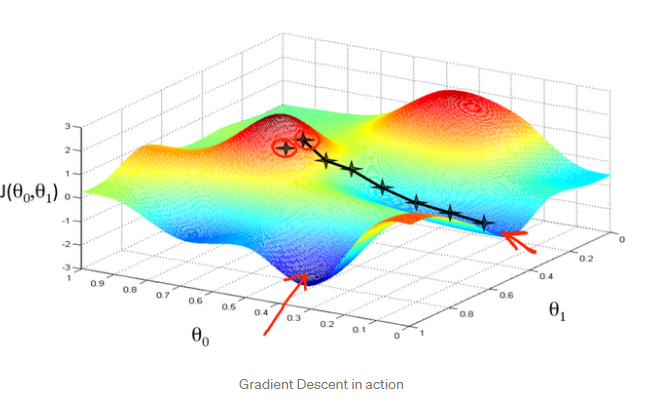